<a href="https://colab.research.google.com/github/Disha-16/earthquake_prediction/blob/main/Earthquake_analysis_using_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/Earthquake analysis and EDA/earthquake_data.csv")
dataset

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


Data preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [4]:
del dataset["title"]

In [5]:
del dataset["location"]

In [6]:
del dataset["country"]

In [7]:
del dataset["continent"]

In [8]:
dataset


,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


Checking for null values

In [9]:
dataset.isnull().sum()

magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
dtype: int64

In [10]:
##dataset["alert"].value_counts()

Handling missing values

In [11]:
dataset["alert"] = dataset["alert"].fillna("red")
dataset.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [12]:
dataset

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,13-01-2001 17:33,0,8,red,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,10-01-2001 16:02,5,7,red,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,09-01-2001 16:49,0,7,red,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,01-01-2001 08:54,0,5,red,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


Changing datatype of datetime column

In [13]:
dataset["date_time"]=pd.to_datetime(dataset["date_time"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   magnitude  782 non-null    float64       
 1   date_time  782 non-null    datetime64[ns]
 2   cdi        782 non-null    int64         
 3   mmi        782 non-null    int64         
 4   alert      782 non-null    object        
 5   tsunami    782 non-null    int64         
 6   sig        782 non-null    int64         
 7   net        782 non-null    object        
 8   nst        782 non-null    int64         
 9   dmin       782 non-null    float64       
 10  gap        782 non-null    float64       
 11  magType    782 non-null    object        
 12  depth      782 non-null    float64       
 13  latitude   782 non-null    float64       
 14  longitude  782 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 91.8+ KB


In [14]:
dataset["date_time"]=pd.DatetimeIndex(dataset["date_time"]).month

In [15]:
#dataset.describe()
dataset.describe(include=['object'])

,alert,net,magType
count,782,782,782
unique,4,11,9
top,red,us,mww
freq,379,747,468


In [16]:
#dataset.magType.value_counts()

Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
alert_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
dataset["alert"]=alert_le.fit_transform(dataset["alert"])
dataset["magType"]=magtype_le.fit_transform(dataset["magType"])
dataset["net"]=net_le.fit_transform(dataset["net"])
dataset

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,11,8,7,0,1,768,9,117,0.509,17.0,8,14.000,-9.7963,159.596
1,6.9,11,4,4,0,0,735,9,99,2.229,34.0,8,25.000,-4.9559,100.738
2,7.0,12,3,3,0,1,755,9,147,3.125,18.0,8,579.000,-20.0508,-178.346
3,7.3,11,5,5,0,1,833,9,149,1.865,21.0,8,37.000,-19.2918,-172.129
4,6.6,9,0,2,0,1,670,9,131,4.998,27.0,8,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,1,0,8,2,0,912,9,427,0.000,0.0,7,60.000,13.0490,-88.660
778,6.9,10,5,7,2,0,745,0,0,0.000,0.0,5,36.400,56.7744,-153.281
779,7.1,9,0,7,2,0,776,9,372,0.000,0.0,6,103.000,-14.9280,167.170
780,6.8,1,0,5,2,0,711,9,64,0.000,0.0,7,33.000,6.6310,126.899


In [18]:
dataset.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
magnitude,1.000000,0.019214,0.209549,0.285552,0.155730,-0.004726,0.515871,-0.105943,0.113114,-0.091403,-0.110626,0.050542,0.030644,-0.008552,-0.013911
date_time,0.019214,1.000000,0.048498,-0.027998,0.015445,0.001256,0.008660,-0.043105,0.019888,0.027084,0.079773,-0.048874,-0.010736,0.006655,0.012253
cdi,0.209549,0.048498,1.000000,0.317937,0.027426,0.160266,0.479788,-0.073884,-0.175417,0.006554,0.098143,0.243428,-0.097891,0.129003,-0.149048
mmi,0.285552,-0.027998,0.317937,1.000000,0.402772,-0.147363,0.442423,-0.108195,0.160417,-0.299074,-0.015723,-0.061865,-0.504439,0.144883,-0.005803
alert,0.155730,0.015445,0.027426,0.402772,1.000000,-0.526716,0.228977,-0.070785,0.555403,-0.455290,0.001144,-0.388123,-0.228411,0.184431,0.082313
tsunami,-0.004726,0.001256,0.160266,-0.147363,-0.526716,1.000000,-0.015500,-0.015190,-0.600231,0.400752,0.116360,0.340445,0.056814,-0.113209,-0.136778
sig,0.515871,0.008660,0.479788,0.442423,0.228977,-0.015500,1.000000,-0.199378,-0.030100,-0.095318,0.114285,0.012673,-0.088667,0.204306,-0.190132
net,-0.105943,-0.043105,-0.073884,-0.108195,-0.070785,-0.015190,-0.199378,1.000000,0.130493,0.097827,-0.148506,0.370464,0.050439,-0.267391,0.262395
nst,0.113114,0.019888,-0.175417,0.160417,0.555403,-0.600231,-0.030100,0.130493,1.000000,-0.529371,-0.118812,-0.327961,-0.121982,0.144204,0.173665
dmin,-0.091403,0.027084,0.006554,-0.299074,-0.455290,0.400752,-0.095318,0.097827,-0.529371,1.000000,-0.021933,0.318009,0.168546,-0.238377,-0.097875


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'date_time'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'alert'}>,
        <Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>, <Axes: title={'center': 'net'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'magType'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

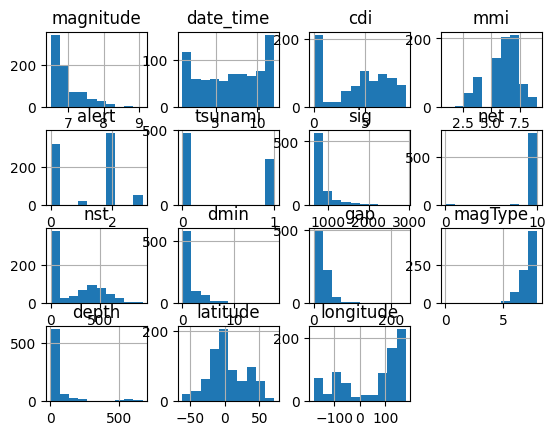

In [19]:
dataset.hist()

In [20]:
x=dataset.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14]]
y=dataset.iloc[:,[5]]

Balancing data using imbalanced techniques

In [21]:
dataset["tsunami"].value_counts()

0    478
1    304
Name: tsunami, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [23]:
from collections import Counter
print(Counter(y_data))

Counter({'tsunami': 1})


Feature selection

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

In [25]:
x_scaled

array([[ 1.2793501 ,  1.17376019,  0.79324477, ..., -0.44968924,
        -0.455099  ,  0.93161189],
       [ 1.2793501 , -0.12198432, -1.2618826 , ..., -0.36822204,
        -0.27698167,  0.4448746 ],
       [ 1.57772988, -0.44592044, -1.94692505, ...,  3.73476219,
        -0.83244469, -1.86306297],
       ...,
       [ 0.38421078,  0.20195181, -1.2618826 , ..., -0.43155998,
        -2.24552983, -0.5884956 ],
       [-1.70444765,  1.49769632, -1.2618826 , ..., -0.44631684,
         1.30091873, -1.33400104],
       [-1.40606787, -0.44592044, -1.2618826 , ...,  2.56313285,
        -0.85832774, -1.85992423]])

Developing the model

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

Creating models

1.Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
y_pred=l1.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [29]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

81.25

2.SVM

In [30]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=2)

In [31]:
y_pred1=SVM.predict(x_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [32]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

82.8125

3.Gaussian Nayev Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
y_pred2=nb.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [35]:
ac2=accuracy_score(y_test,y_pred2)*100
ac2

78.64583333333334

4.Decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred3=dt.predict(x_test)
y_pred3

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [38]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

93.75

Ensemble technique

In [39]:
from sklearn.ensemble import VotingClassifier
bc=VotingClassifier(estimators=[("logisticRegression",l1),("svm",SVM),("naivebayes",nb),("Decision Tree Classification", dt)])
bc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('logisticRegression', LogisticRegression()),
                             ('svm', SVC(kernel='linear', random_state=2)),
                             ('naivebayes', GaussianNB()),
                             ('Decision Tree Classification',
                              DecisionTreeClassifier())])

In [40]:
y_pred4=bc.predict(x_test)
y_pred4

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [41]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
ac4

81.77083333333334

cross validation using KFold techniques

In [42]:
from sklearn.model_selection import KFold
kf=KFold()
kf.split(x_train,y_train)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [43]:
# k= 7
# kf = KFold(n_splits=k, shuffle=True)
# kf

In [44]:
from sklearn.model_selection import cross_val_predict
cross_pred=cross_val_predict(bc,x_test,y_test,cv=kf)
cross_pred

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [45]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(bc,x_train,y_train,cv=kf)
cross_score

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([0.83660131, 0.83660131, 0.76470588, 0.85620915, 0.80263158])

In [46]:
ac5=cross_score.mean()*100
ac5

81.93498452012385